<a href="https://colab.research.google.com/github/Akasxh/ML/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#for all models to test
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# creating the data frame
# its all random so the predicted results may not be always correct
df = pd.DataFrame({
    'Age': np.random.choice(range(25, 71), 50),
    'Gender': np.random.choice(['Male', 'Female'], 50),
    'BMI': np.random.uniform(18, 40, 50),
    'Blood_Pressure': np.random.choice(range(80, 181), 50),
    'Glucose': np.random.choice(range(70, 201), 50),
    'Insulin': np.random.choice(range(0, 301), 50),
    'Cholesterol': np.random.uniform(100, 300, 50),
    'HbA1c': np.random.uniform(4, 12, 50),
    'Status': np.random.choice(['Yes', 'No'], 50)
})

In [10]:
# Convert Gender and Status to numeric to make it usuable
df['Gender'] = pd.factorize(df['Gender'])[0] # 0 for male and 1 for female acc to above df
df['Status'] = pd.factorize(df['Status'])[0] # 0 for yes and 1 for no

In [32]:
# Split the data into training and testing sets this for training my LR model or any other model
X_train, X_test, y_train, y_test = train_test_split(
    df[['Age', 'Gender', 'BMI', 'Blood_Pressure']],
    df['Status'],
    test_size=0.2,
    random_state=42
)

In [33]:
# classification model use any that have been imported to see better accuracy
#LogisticRegression #RandomForestClassifier #DecisionTreeClassifier #LinearRegression btw LR doesnt predict well in classific
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [35]:
# Calculate accuracy by comparing y_test and our actual prediction
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print("Acurracy can vary as we have randomised data in df and not actual data")
#the acurracy can vary as we are having randomised value in our dataframe

Accuracy: 0.5
Acurracy can vary as we have randomised data in df and not actual data


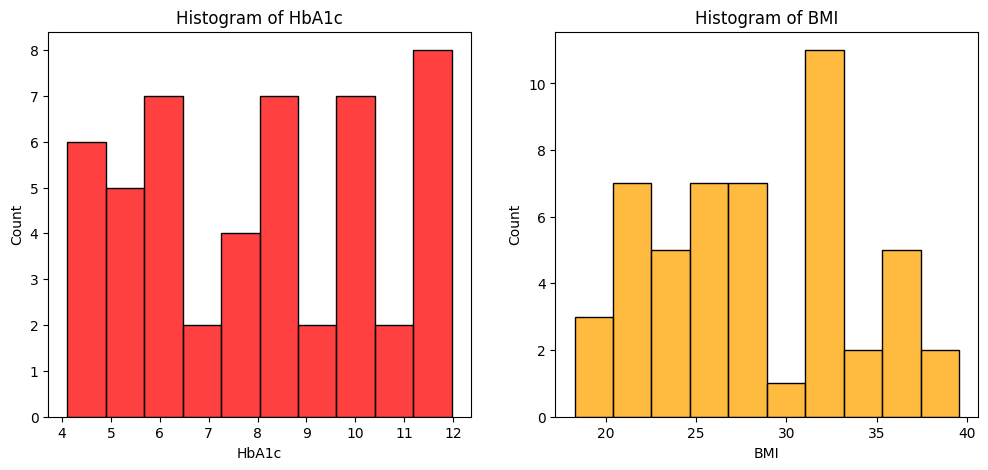

In [36]:
#plots
# Plot histograms for HbA1c and BMI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['HbA1c'], bins=10, color='red')
plt.title('Histogram of HbA1c')
#set intervals as you like here i've taken bin = 10 default is 15
plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=10, color='orange')
plt.title('Histogram of BMI')

plt.show()

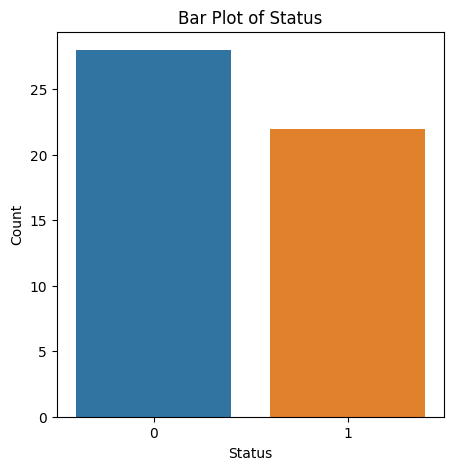

In [37]:
# Bar plot for Status
plt.figure(figsize=(5, 5))
sns.countplot(x='Status', data=df)
plt.title('Bar Plot of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [39]:
# Function to predict the class for a new patient
def predict_new_patient(model, new_data):
    new_data = pd.DataFrame(new_data, index=[0])  # Convert to DataFrame
    predicted_probabilities = model.predict_proba(new_data[['Age', 'Gender', 'BMI', 'Blood_Pressure']])[:, 1]
    predicted_class = (predicted_probabilities > 0.5).astype(int) #for 0:flase and 1:true in integer as the value is always bw 0:1
    return predicted_class[0]

In [45]:
# data of the patient
new_patient_data = {
    'Age': float(input("Enter Age: ")),
    'Gender': int(input("Enter Gender (1 for Female, 0 for Male): ")),
    'BMI': float(input("Enter BMI(5-30 normal): ")),
    'Blood_Pressure': float(input("Enter Blood Pressure(60-120 normal): ")),
}

Enter Age: 99
Enter Gender (1 for Female, 0 for Male): 0
Enter BMI(5-30 normal): 30
Enter Blood Pressure(60-120 normal): 120


In [46]:
prediction_for_new_patient = predict_new_patient(model, new_patient_data)
print(f"Predicted Class for New Patient: {prediction_for_new_patient}")
print("0:no diabetes 1:diabetes")

Predicted Class for New Patient: 1
0:no diabetes 1:diabetes
